In [1]:
import tensorflow as tf 
from tensorflow import keras 
import numpy as np 
import matplotlib.pyplot as plt 
import pandas as pd 

/Users/yashsolanki/opt/anaconda3/lib/python3.8/site-packages/scipy/__init__.py:138: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.4)
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion} is required for this version of "


In [2]:
df = pd.read_csv("Crop_recommendation.csv")

In [3]:
df.head()

,N,P,K,temperature,humidity,ph,rainfall,label
0,90,42,43,20.879744,82.002744,6.502985,202.935536,rice
1,85,58,41,21.770462,80.319644,7.038096,226.655537,rice
2,60,55,44,23.004459,82.320763,7.840207,263.964248,rice
3,74,35,40,26.491096,80.158363,6.980401,242.864034,rice
4,78,42,42,20.130175,81.604873,7.628473,262.717340,rice


In [4]:
df.describe()

,N,P,K,temperature,humidity,ph,rainfall
count,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000
mean,50.551818,53.362727,48.149091,25.616244,71.481779,6.469480,103.463655
std,36.917334,32.985883,50.647931,5.063749,22.263812,0.773938,54.958389
min,0.000000,5.000000,5.000000,8.825675,14.258040,3.504752,20.211267
25%,21.000000,28.000000,20.000000,22.769375,60.261953,5.971693,64.551686
50%,37.000000,51.000000,32.000000,25.598693,80.473146,6.425045,94.867624
75%,84.250000,68.000000,49.000000,28.561654,89.948771,6.923643,124.267508
max,140.000000,145.000000,205.000000,43.675493,99.981876,9.935091,298.560117


In [5]:
df.columns

Index(['N', 'P', 'K', 'temperature', 'humidity', 'ph', 'rainfall', 'label'], dtype='object')

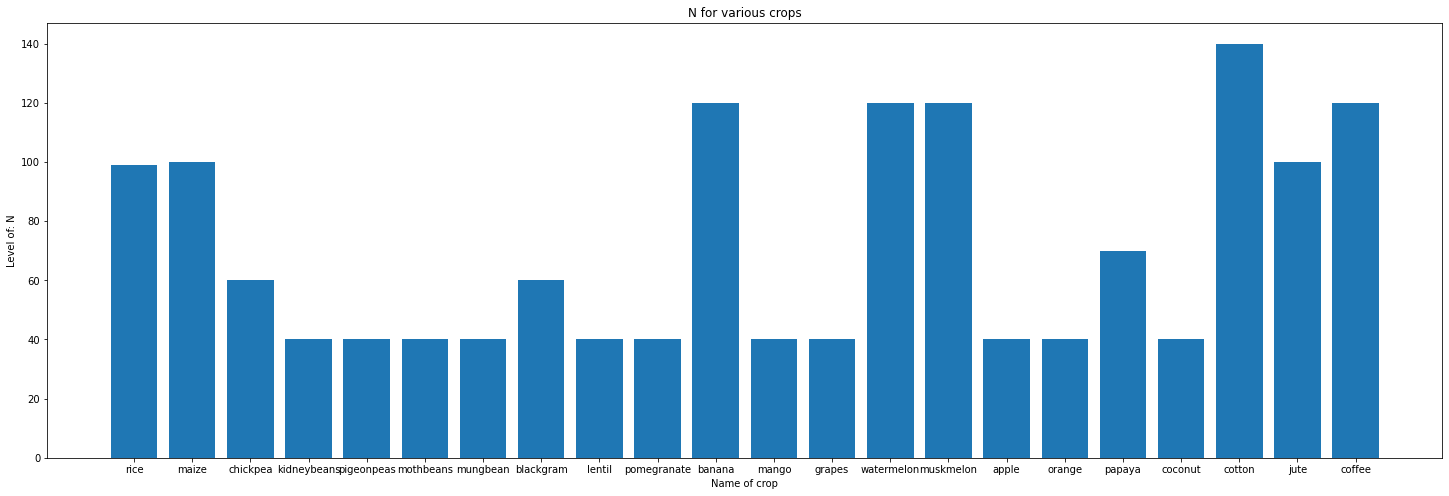

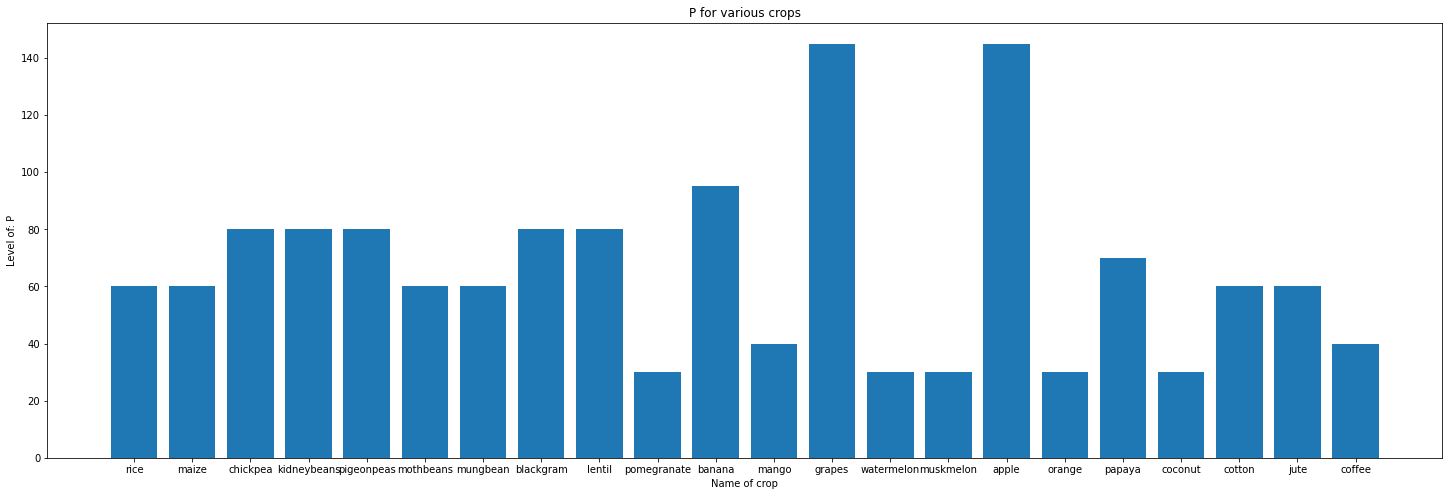

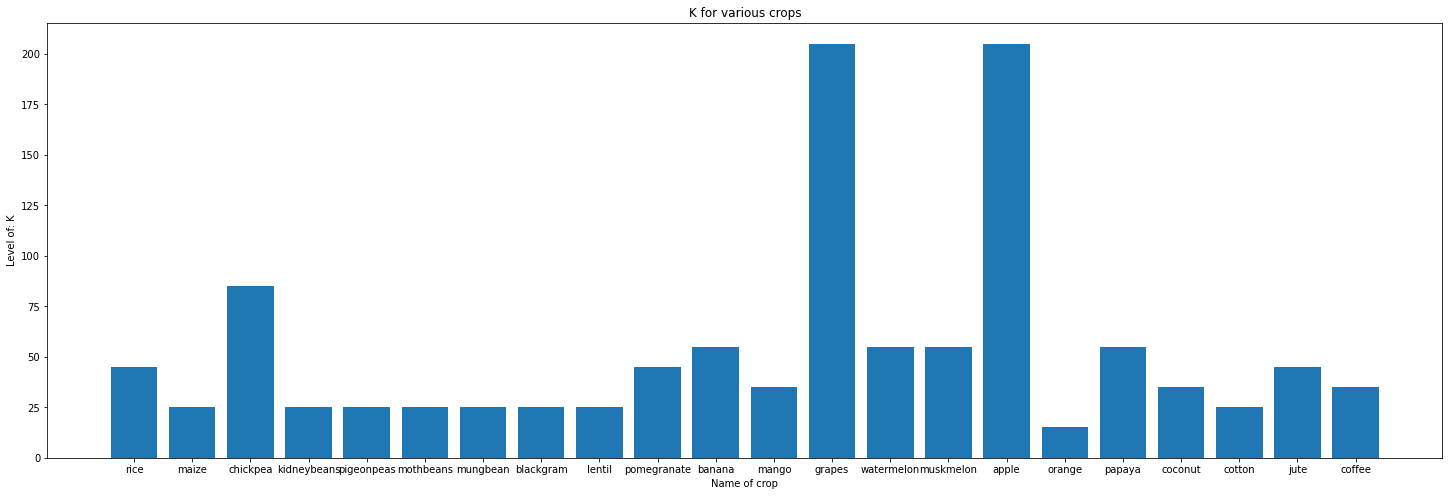

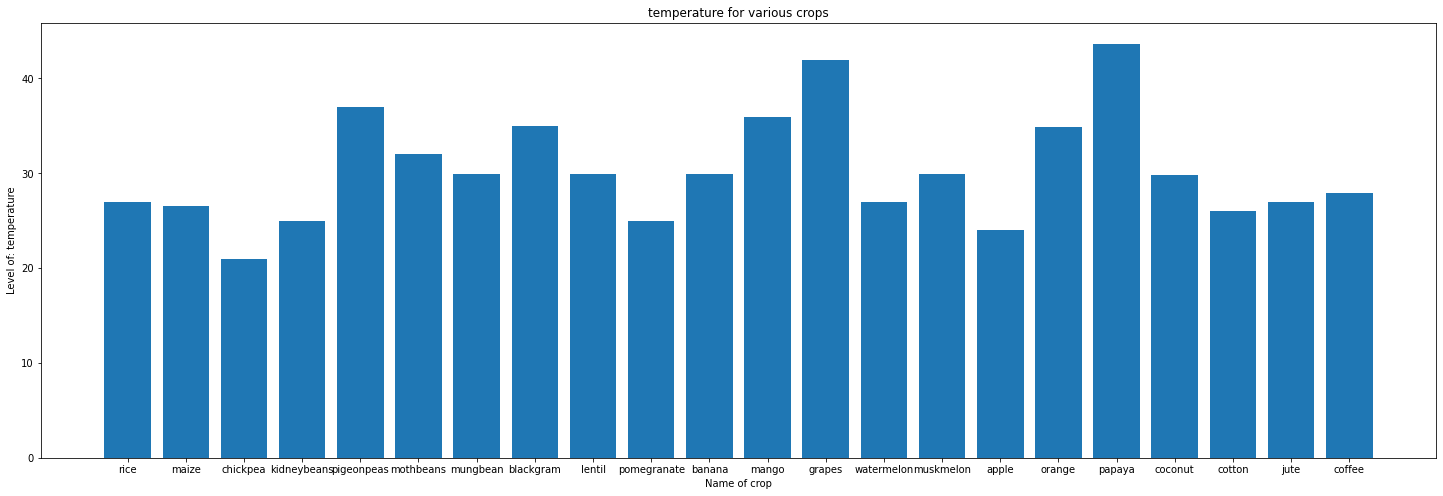

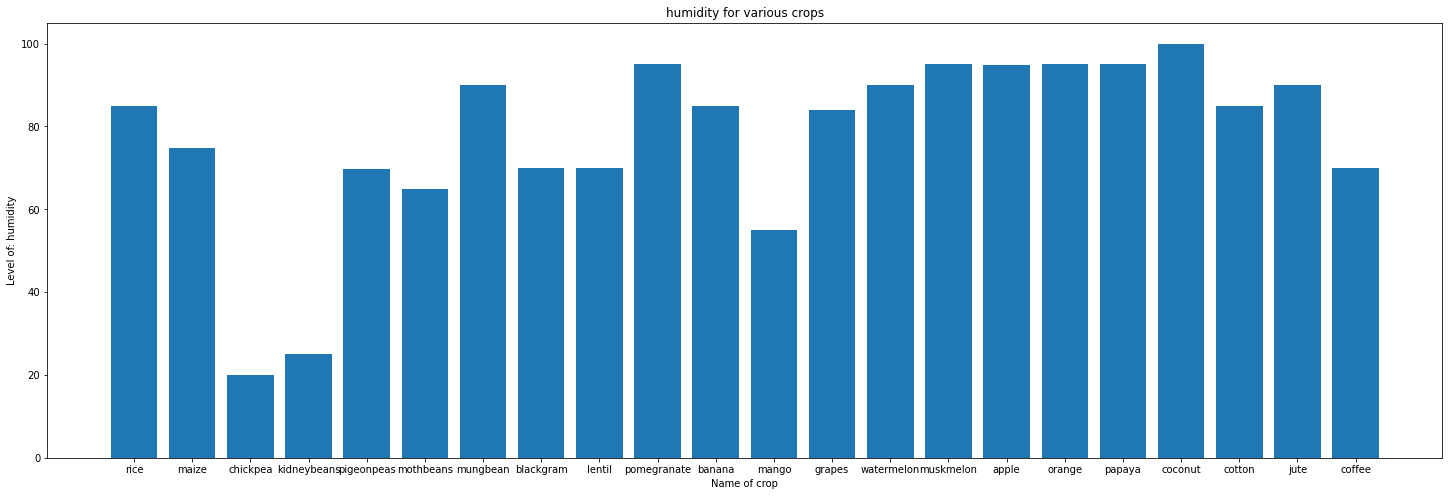

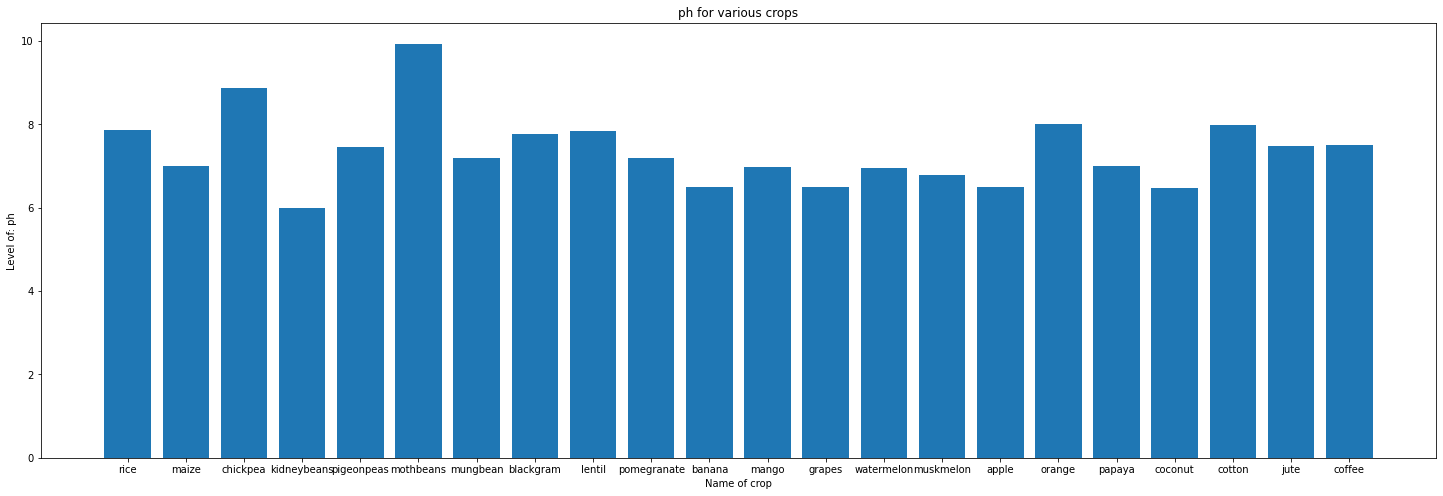

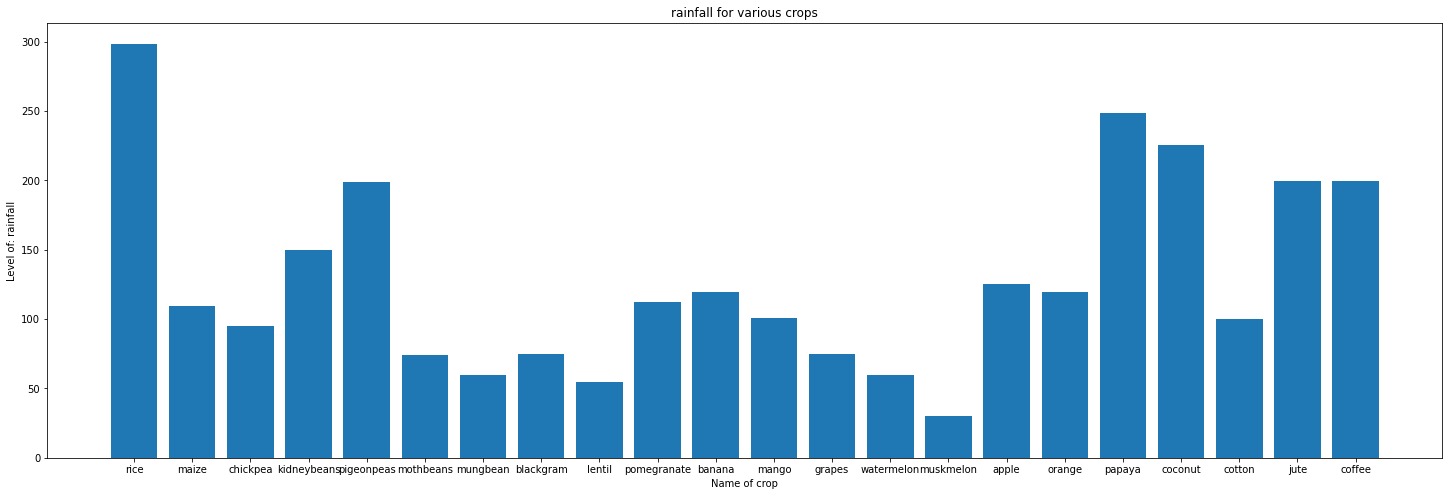

In [6]:
for i in df.columns:
    if i != 'label':
        fig = plt.figure(figsize=(25, 8))
        plt.bar(df['label'], df[i])
        plt.title(f"{i} for various crops")
        plt.ylabel(f"Level of: {i}")
        plt.xlabel(f"Name of crop")
        plt.savefig(f"outputs/{i}")
        plt.show()

## Outlier Detection

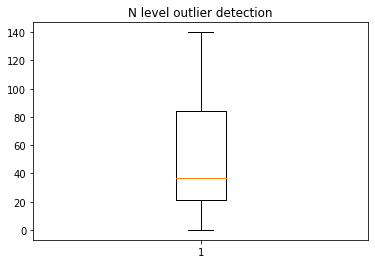

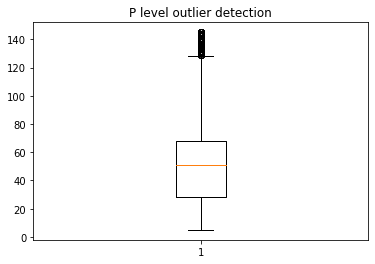

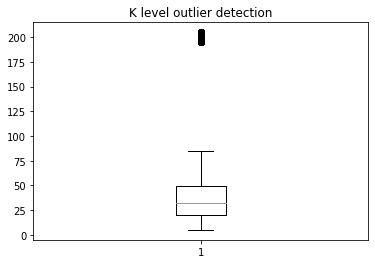

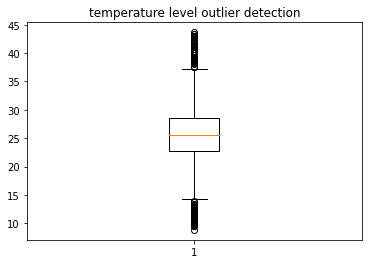

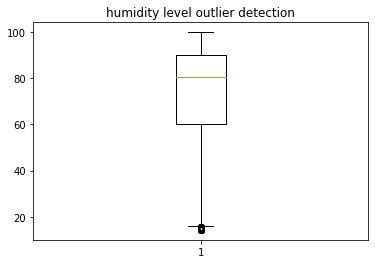

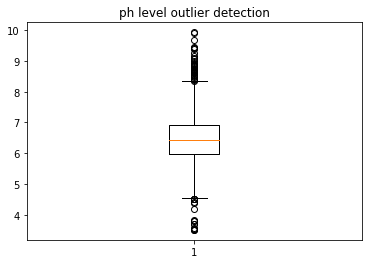

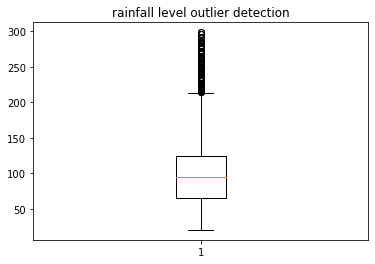

In [7]:
for i in df.columns:
    if i != 'label':
        plt.boxplot(df[i])
        plt.title(f"{i} level outlier detection")
        plt.savefig(f"outputs/{i}")
        plt.show()

## Creating features and targets

In [14]:
x_train = []
y_train = []
df.label = pd.Categorical(pd.factorize(df.label)[0])
for i in df.columns:
    if i != 'label':
        x_train.append(df[i].to_list())
    else:
        y_train = df[i].to_list()
    
x_train = np.array(x_train).T
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))
y_train = np.array(y_train)

In [9]:
x_train.shape, y_train.shape

((2200, 7), (2200,))

In [10]:
model = keras.Sequential([
    keras.layers.Dense(1000, activation='relu'),
    keras.layers.Dense(500, activation='relu'), 
    keras.layers.Dense(100, activation='relu'), 
    keras.layers.Dense(50, activation='relu'), 
    keras.layers.Dense(len(set(y_train)), activation='softmax')
])

model.compile(optimizer='nadam', loss='sparse_categorical_crossentropy')
model.fit(x_train, y_train, epochs=20, batch_size=10)

Epoch 1/20
220/220 [==============================] - 5s 8ms/step - loss: 1.0556
Epoch 2/20
220/220 [==============================] - 2s 8ms/step - loss: 0.4435
Epoch 3/20
220/220 [==============================] - 2s 8ms/step - loss: 0.2567
Epoch 4/20
220/220 [==============================] - 2s 9ms/step - loss: 0.1996
Epoch 5/20
220/220 [==============================] - 2s 9ms/step - loss: 0.2199
Epoch 6/20
220/220 [==============================] - 2s 9ms/step - loss: 0.1990
Epoch 7/20
220/220 [==============================] - 2s 9ms/step - loss: 0.1862
Epoch 8/20
220/220 [==============================] - 2s 9ms/step - loss: 0.1662
Epoch 9/20
220/220 [==============================] - 2s 9ms/step - loss: 0.1687
Epoch 10/20
220/220 [==============================] - 2s 9ms/step - loss: 0.1548
Epoch 11/20
220/220 [==============================] - 2s 10ms/step - loss: 0.1560
Epoch 12/20
220/220 [==============================] - 2s 10ms/step - loss: 0.1600
Epoch 13/20
220/220 [==

In [11]:
model.save("Initial-model/")

INFO:tensorflow:Assets written to: Initial-model/assets


INFO:tensorflow:Assets written to: Initial-model/assets


In [23]:
model_2 = keras.Sequential([
    keras.layers.LSTM(40, activation='relu', return_sequences=True), 
    keras.layers.LSTM(10, activation='relu'),
    keras.layers.Dense(len(set(y_train)), activation='softmax')
])
model_2.compile(optimizer='adam', loss='sparse_categorical_crossentropy')
history = model_2.fit(x_train, y_train, epochs=20)

Epoch 1/20
69/69 [==============================] - 4s 5ms/step - loss: 3.3163
Epoch 2/20
69/69 [==============================] - 0s 5ms/step - loss: 2.1911
Epoch 3/20
69/69 [==============================] - 0s 5ms/step - loss: 1.5005
Epoch 4/20
69/69 [==============================] - 0s 6ms/step - loss: 1.1029
Epoch 5/20
69/69 [==============================] - 0s 6ms/step - loss: 0.8609
Epoch 6/20
69/69 [==============================] - 0s 7ms/step - loss: 0.7440
Epoch 7/20
69/69 [==============================] - 0s 5ms/step - loss: 0.6650
Epoch 8/20
69/69 [==============================] - 0s 5ms/step - loss: 0.5735
Epoch 9/20
69/69 [==============================] - 0s 5ms/step - loss: 0.4933
Epoch 10/20
69/69 [==============================] - 0s 5ms/step - loss: 0.4104
Epoch 11/20
69/69 [==============================] - 0s 5ms/step - loss: 0.3098
Epoch 12/20
69/69 [==============================] - 0s 5ms/step - loss: 0.3670
Epoch 13/20
69/69 [==============================

In [24]:
model_2.save("rnn-v1.0/")

INFO:tensorflow:Assets written to: rnn-v1.0/assets


INFO:tensorflow:Assets written to: rnn-v1.0/assets


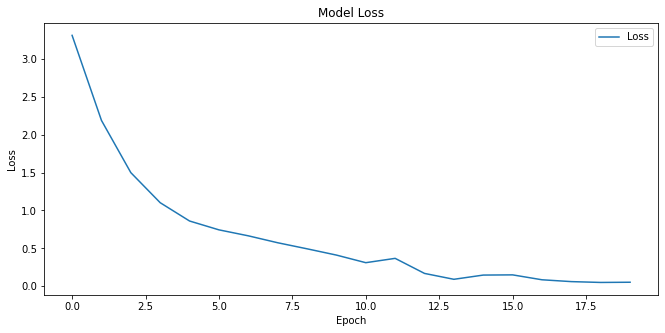

In [30]:
fig = plt.figure(figsize=(11, 5))
plt.plot(history.history['loss'], label='Loss')
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend()
plt.savefig("LSTM Model Loss")
plt.show()